<h1>目录<span class="tocSkip"></span></h1>
<div class="toc"><li><span><a href="#导入库，加载数据" data-toc-modified-id="导入库，加载数据-1">导入库，加载数据</a></span><li><span><a href="#问题1:数据清洗与预处理"  data-toc-modified-id="问题1-2">问题 1：数据清洗与预处理，该数据集可能存在缺失值或异常值，请描述如何处理这类问题，并说明理由？</a></span></li><li><span><a href="#问题2:数据分析" data-toc-modified-id="问题2:数据分析-3">问题 2：数据分析，基于以上数据集，请给出数据分析思路，并可视化展示结果（例如：功能使用活跃度、使用时长等）?</a></span></li><ul class="toc-item"><li><span><a href="#1.功能使用活跃度分析及两车型比较" data-toc-modified-id="1.功能使用活跃度分析及两车型比较-3.1">1.功能使用活跃度分析及两车型比较</a></span></li></ul><ul class="toc-item"><li><span><a href="#2.功能使用时长分析及两车型比较" data-toc-modified-id="2.功能使用时长分析及两车型比较-3.2">2.功能使用时长分析及两车型比较</a></span></li></ul><ul class="toc-item"><li><span><a href="#3.不同功能使用状况与日期间的关系" data-toc-modified-id="3.不同功能使用状况与日期间的关系-3.3">3.不同功能使用状况与日期间的关系</a></span></li></ul><ul class="toc-item"><li><span><a href="#4.用户类型分析" data-toc-modified-id="4.用户类型分析-3.4">4.用户类型分析</a></span></li></ul><li><span><a href="#问题3:数据结论" data-toc-modified-id="数据结论-5">问题3:数据结论，基于以上数据分析结果，请给出你的数据洞察及其可能的原因？</a></span></li></div>

# 导入库，加载数据

In [26]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.metrics import silhouette_score  # 导入轮廓系数指数
from sklearn.cluster import KMeans      # KMeans模块
%matplotlib inline
# 设置属性防止中文乱码
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [5]:
raw_data = pd.read_excel('Intelligent Cockpit Data Analysis Question for GT.xlsx', sheet_name='数据源')
raw_data.head()

,date,vin,car_series,ivi_start_cnt,voice_wake_up,navigation_use_count,navigation_use_duration,qq_music_count,qq_music_duration,bluetooth_music_count,bluetooth_music_duration,usb_music_count,usb_music_duration,fm_count,fm_duration
0,2024-05-02,LVSHFC******716469,CDX706,4,1,0,0,2,89,0,0.0,0,0,0,0
1,2024-05-02,LVSHFC******766497,CDX706,4,0,0,0,0,0,0,0.0,0,0,0,0
2,2024-05-02,LVSHFC******767892,CDX706,34,0,0,0,0,0,0,0.0,5,2792,0,0
3,2024-05-02,LVSHFC******760016,CDX706,4,0,0,0,2,34,0,0.0,1,0,0,0
4,2024-05-02,LVSHFC******810473,CDX706,17,3,1,3907,0,0,7,5116.0,0,0,0,0


# 问题1:数据清洗与预处理

首先检查数据中的缺失值

In [6]:
raw_data.info() # 打印数据类型分布

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54217 entries, 0 to 54216
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      54217 non-null  datetime64[ns]
 1   vin                       54217 non-null  object        
 2   car_series                54217 non-null  object        
 3   ivi_start_cnt             54217 non-null  int64         
 4   voice_wake_up             54217 non-null  int64         
 5   navigation_use_count      54217 non-null  int64         
 6   navigation_use_duration   54217 non-null  int64         
 7   qq_music_count            54217 non-null  int64         
 8   qq_music_duration         54217 non-null  int64         
 9   bluetooth_music_count     54217 non-null  int64         
 10  bluetooth_music_duration  54213 non-null  float64       
 11  usb_music_count           54217 non-null  int64         
 12  usb_music_duration

In [7]:
# 缺失值审查
na_cols = raw_data.isnull().any(axis=0)
na_cols

date                        False
vin                         False
car_series                  False
ivi_start_cnt               False
voice_wake_up               False
navigation_use_count        False
navigation_use_duration     False
qq_music_count              False
qq_music_duration           False
bluetooth_music_count       False
bluetooth_music_duration     True
usb_music_count             False
usb_music_duration          False
fm_count                    False
fm_duration                 False
dtype: bool

In [8]:
# 查看具有缺失值的行总记录数
raw_data.isnull().sum().sort_values(ascending=True)

date                        0
vin                         0
car_series                  0
ivi_start_cnt               0
voice_wake_up               0
navigation_use_count        0
navigation_use_duration     0
qq_music_count              0
qq_music_duration           0
bluetooth_music_count       0
usb_music_count             0
usb_music_duration          0
fm_count                    0
fm_duration                 0
bluetooth_music_duration    4
dtype: int64

发现蓝牙音乐使用时长这一列有缺失值，由于带有缺失值的行并不多，可以直接删除带有缺失值的行，这样可以消除其对后续分析以及模型训练的影响。

In [9]:
raw_data.describe().round(2).T    # 打印原始数据基本描述性信息

,count,mean,std,min,25%,50%,75%,max
ivi_start_cnt,54217.0,7.60,8.43,0.0,2.0,5.0,10.0,178.0
voice_wake_up,54217.0,3.55,7.59,0.0,0.0,1.0,4.0,285.0
navigation_use_count,54217.0,0.57,1.48,0.0,0.0,0.0,0.0,36.0
navigation_use_duration,54217.0,1186.83,3498.24,0.0,0.0,0.0,0.0,77851.0
qq_music_count,54217.0,4.34,8.77,0.0,0.0,0.0,5.0,181.0
qq_music_duration,54217.0,2057.29,4771.38,0.0,0.0,0.0,2031.0,141352.0
bluetooth_music_count,54217.0,4.03,7.68,0.0,0.0,0.0,5.0,175.0
bluetooth_music_duration,54213.0,3776.79,7893.32,0.0,0.0,0.0,4224.0,144384.0
usb_music_count,54217.0,0.77,3.29,0.0,0.0,0.0,0.0,91.0
usb_music_duration,54217.0,555.19,2783.94,0.0,0.0,0.0,0.0,82125.0


接下来检测异常值，首先功能使用时长和使用次数列中为负的值为异常值。其次对于使用时长而言，每个功能当天的使用时常不应该超过86400秒，所以所有功能使用时长列中超过86400秒(60x60x24=86400s)的值为异常值。由描述信息可见，QQ音乐使用时间列、蓝牙音乐使用时间列以及FM使用时间列都存在异常值，需要删除带有这些异常值的行来保证数据集的质量，避免对后续分析以及模型建立带来误差，提升准确度。

此外当ivi_start和voice_wake_up同时为0时，及当天系统未开机也未进行语音唤醒，还是存在不同功能使用的情况，因此怀疑当ivi_start列和voice_wake_up列同时为0时，其他功能使用次数和时长却不为0的行也应该为异常数据，但由于不清楚系统开机、语音唤醒与功能使用之间的具体逻辑，同时也存在系统在前一天开启就未关闭的可能，本次分析并未删除该类数据。

In [192]:
df_cleaned = raw_data[(raw_data.iloc[:, 3:] >= 0).all(axis=1)&(raw_data.iloc[:, 3:] <= 86400).all(axis=1)].dropna()
df_cleaned.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
ivi_start_cnt,54193.0,7.59,8.41,0.0,2.0,5.0,10.0,178.0
voice_wake_up,54193.0,3.54,7.55,0.0,0.0,1.0,4.0,285.0
navigation_use_count,54193.0,0.57,1.48,0.0,0.0,0.0,0.0,36.0
navigation_use_duration,54193.0,1183.29,3475.09,0.0,0.0,0.0,0.0,77851.0
qq_music_count,54193.0,4.34,8.75,0.0,0.0,0.0,5.0,181.0
qq_music_duration,54193.0,2053.54,4720.34,0.0,0.0,0.0,2031.0,84318.0
bluetooth_music_count,54193.0,4.01,7.57,0.0,0.0,0.0,5.0,175.0
bluetooth_music_duration,54193.0,3744.34,7669.65,0.0,0.0,0.0,4220.0,86027.0
usb_music_count,54193.0,0.77,3.29,0.0,0.0,0.0,0.0,91.0
usb_music_duration,54193.0,554.19,2777.46,0.0,0.0,0.0,0.0,82125.0


上述操作删除了带有缺失值和异常值的行，完成了对于数据清洗与预处理。

# 问题2:数据分析

首先对数据的各个特征分布进行可视化，发掘数据各个维度的特点

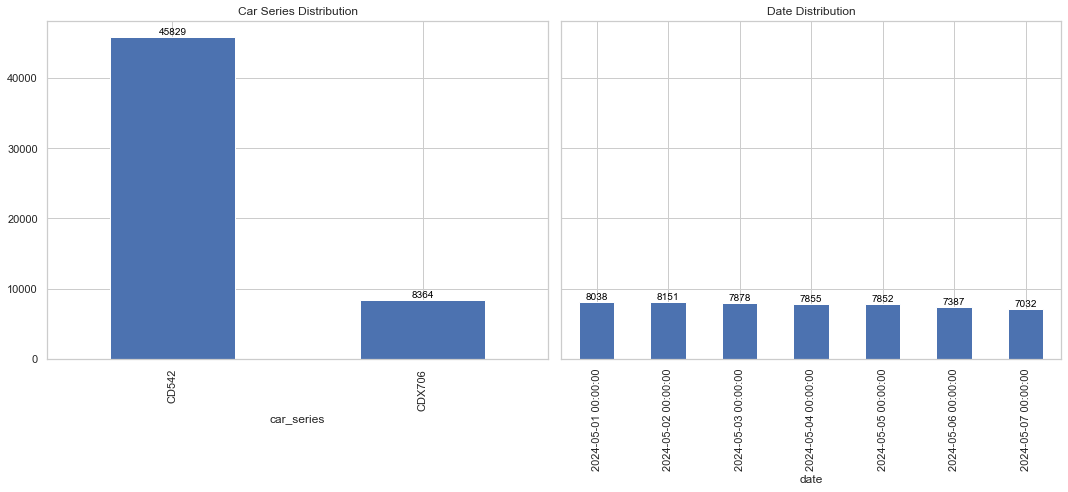

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7), sharey=True)  

# 车型分布
ax1 = df_cleaned.groupby('car_series').car_series.count().plot.bar(ax=axes[0], ylim=0)
ax1.set_title('Car Series Distribution')
for p in ax1.patches:
    ax1.annotate(
        str(p.get_height()), 
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', 
        va='center', 
        fontsize=10, 
        color='black', 
        xytext=(0, 5), 
        textcoords='offset points'
    )

# 日期分布
ax2 = df_cleaned.groupby('date').date.count().plot.bar(ax=axes[1], ylim=0)
ax2.set_title('Date Distribution')
for p in ax2.patches:
    ax2.annotate(
        str(p.get_height()), 
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', 
        va='center', 
        fontsize=10, 
        color='black', 
        xytext=(0, 5), 
        textcoords='offset points'
    )
plt.tight_layout()  
plt.show()

由上图可见，数据中的型号分布并不均匀，数据主要集中在福特蒙迪欧这款车型中。所以除了对所有车型进行功能使用活跃度和使用时长的分析，还可以单独对每个车型进行分析，比较不同车型之间各功能的使用频率与使用时长差异。

此外，数据中的日期分布较为均匀，范围为2024年5月1日至7日，正好为一周，因此也可以根据该数据分析一周内不同日期与各功能使用情况的关系，比如寻找一周内各功能的高峰日期。

最后还可以根据每个用户对不同功能的使用次数和时长，进行聚类分析（如 K-Means 聚类），实现用户类型的识别与划分。

综上所述，我将对清理好的数据进行以下4个方面的分析：

1.功能使用活跃度分析及两车型比较

2.功能使用时长分析及两车型比较

3.不同功能使用状况与日期间的关系

4.用户类型分析

## 1.功能使用活跃度分析及两车型比较

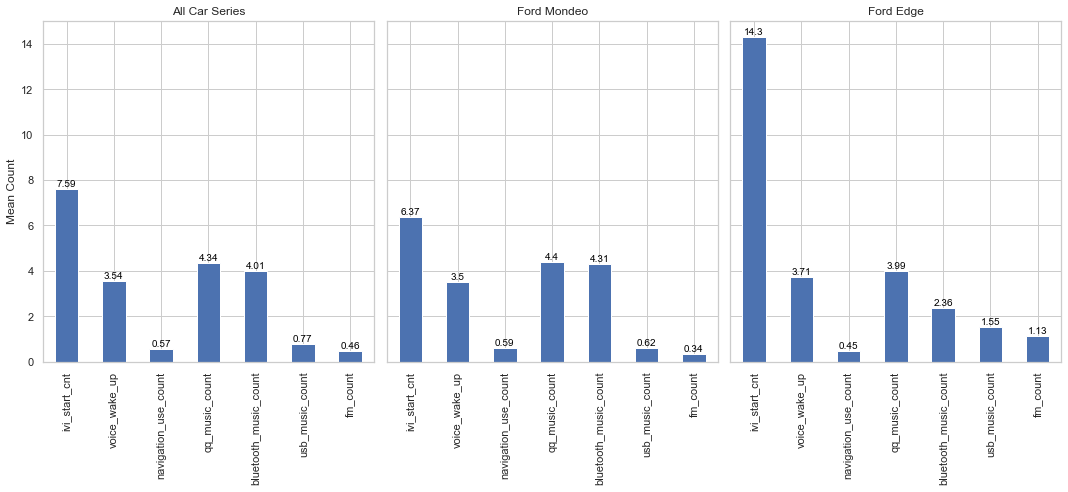

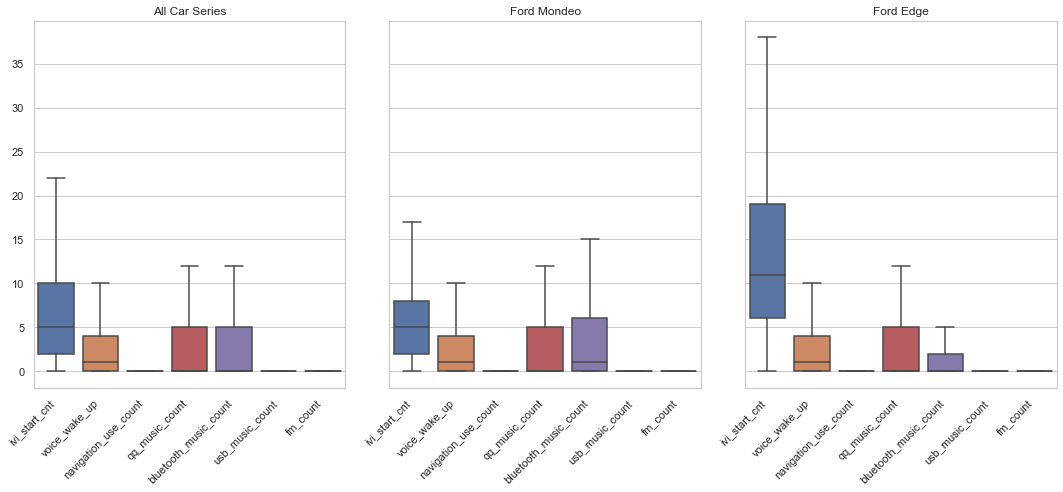

In [64]:
df_m = df_cleaned[df_cleaned['car_series'] == 'CD542']
df_r = df_cleaned[df_cleaned['car_series'] == 'CDX706']

fig, axes = plt.subplots(1, 3, figsize=(15, 7), sharey=True)

columns = ['ivi_start_cnt', 'voice_wake_up', 'navigation_use_count', 
           'qq_music_count', 'bluetooth_music_count', 'usb_music_count', 'fm_count']

datasets = [
    (df_cleaned, 'All Car Series', axes[0]),
    (df_m, 'Ford Mondeo', axes[1]),
    (df_r, 'Ford Edge', axes[2])
]

for df, title, ax in datasets:
    df[columns].mean().plot.bar(ax=ax,title=title)
    ax.set_ylabel('Mean Count')
    for p in ax.patches:
        ax.annotate(
            str(round(p.get_height(), 2)), 
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', 
            va='center', 
            fontsize=10, 
            color='black', 
            xytext=(0, 5), 
            textcoords='offset points'
        )
    
plt.tight_layout()
plt.show()

sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(15, 7), sharey=True)

columns = ['ivi_start_cnt', 'voice_wake_up', 'navigation_use_count', 
           'qq_music_count', 'bluetooth_music_count', 'usb_music_count', 'fm_count']

datasets = [
    (df_cleaned, 'All Car Series', axes[0]),
    (df_m, 'Ford Mondeo', axes[1]),
    (df_r, 'Ford Edge', axes[2])
]

for df, title, ax in datasets:
    sns.boxplot(data=df[columns], ax=ax, showfliers=False)
    ax.set_title(title)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

由各功能每天使用次数的均值柱状图和箱线图可知，对于所有车型用户一天内使用频率较高的功能依次为QQ音乐，蓝牙音乐和语音唤醒。USB音乐，FM和百度导航在一天内的使用次数较低。比较两个车型可以发现，锐界用户的蓝牙音乐使用频率低于蒙迪欧车主，但是USB音乐和FM的使用频率则高于蒙迪欧用户，其他功能使用频率相差不多。

## 2.功能使用时长分析及两车型比较

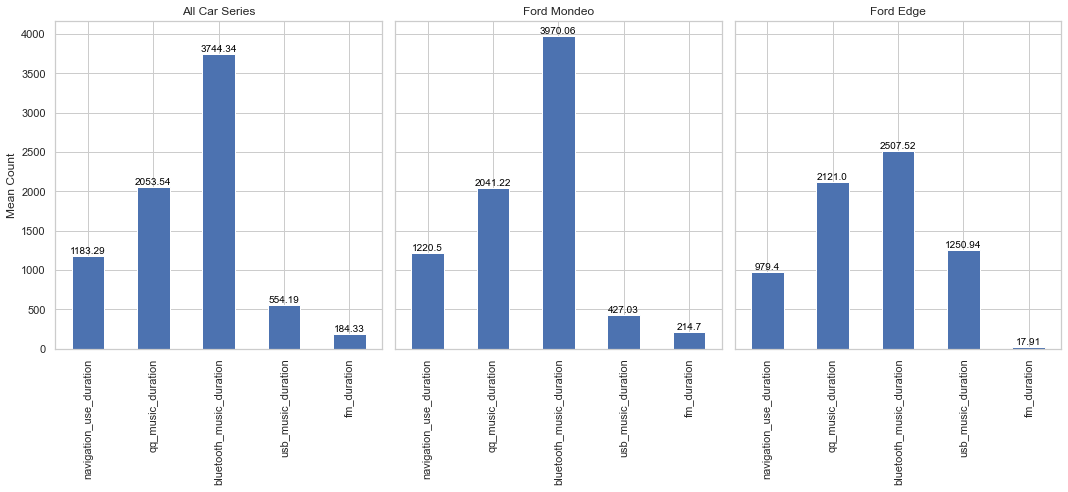

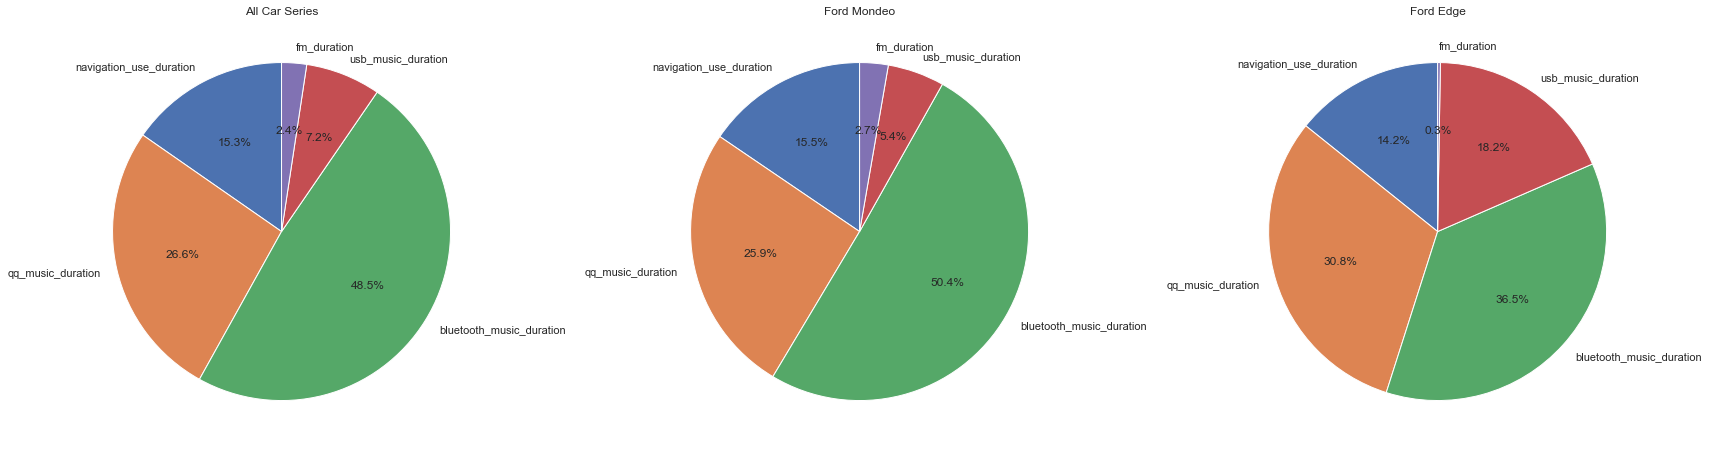

In [65]:
df_m = df_cleaned[df_cleaned['car_series'] == 'CD542']
df_r = df_cleaned[df_cleaned['car_series'] == 'CDX706']

fig, axes = plt.subplots(1, 3, figsize=(15, 7), sharey=True)

columns = ['navigation_use_duration','qq_music_duration', 
           'bluetooth_music_duration', 'usb_music_duration', 'fm_duration']

datasets = [
    (df_cleaned, 'All Car Series', axes[0]),
    (df_m, 'Ford Mondeo', axes[1]),
    (df_r, 'Ford Edge', axes[2])
]

for df, title, ax in datasets:
    df[columns].mean().plot.bar(ax=ax,title=title)
    ax.set_ylabel('Mean Count')
    for p in ax.patches:
        ax.annotate(
            str(round(p.get_height(), 2)), 
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', 
            va='center', 
            fontsize=10, 
            color='black', 
            xytext=(0, 5), 
            textcoords='offset points'
        )
    
plt.tight_layout()
plt.show()

datasets = [
    (df_cleaned, 'All Car Series'),
    (df_m, 'Ford Mondeo'),
    (df_r, 'Ford Edge')
]

fig, axes = plt.subplots(1, 3, figsize=(24, 8))

for (df, title), ax in zip(datasets, axes):
    averages = df[columns].mean()
    ax.pie(averages, labels=averages.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(title)

plt.tight_layout()
plt.show()

对于所有车型一天内使用时长最长的功能依次为蓝牙音乐，QQ音乐和百度导航。两个车型相比，锐界用户一天内的USB音乐使用时长的均值比蒙迪欧用户多了12.8%，因此其蓝牙音乐的使用时长相比减少了13.9%。此外，锐界用户的FM使用时长比蒙迪欧用户较低，其他功能使用时长相差不大。

## 3.不同功能使用状况与日期间的关系

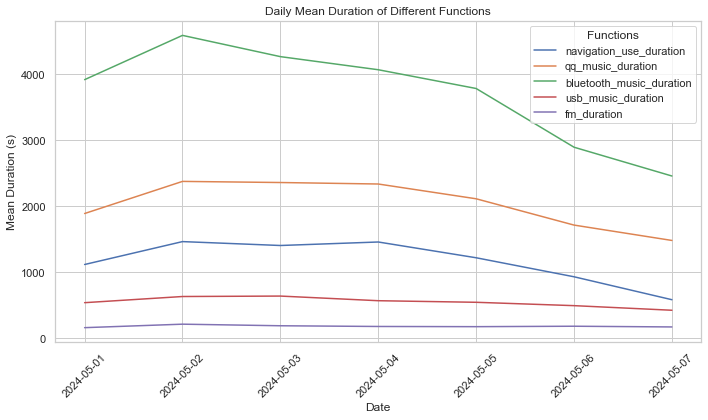

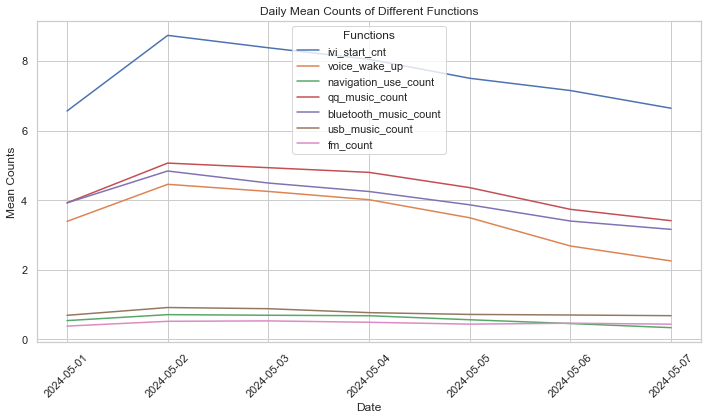

In [66]:
columns = ['navigation_use_duration', 'qq_music_duration', 
           'bluetooth_music_duration', 'usb_music_duration', 'fm_duration']

df_grouped = df_cleaned.groupby('date').mean()

plt.figure(figsize=(10, 6))

for column in columns:
    plt.plot(df_grouped.index, df_grouped[column], label=column)

plt.xlabel('Date')
plt.ylabel('Mean Duration (s)')
plt.title('Daily Mean Duration of Different Functions')
plt.legend(title='Functions')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

columns = ['ivi_start_cnt', 'voice_wake_up', 'navigation_use_count', 
           'qq_music_count', 'bluetooth_music_count', 'usb_music_count', 'fm_count']

df_grouped = df_cleaned.groupby('date').mean()

plt.figure(figsize=(10, 6))

for column in columns:
    plt.plot(df_grouped.index, df_grouped[column], label=column)

plt.xlabel('Date')
plt.ylabel('Mean Counts')
plt.title('Daily Mean Counts of Different Functions')
plt.legend(title='Functions')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

由上图所示，几乎所由功能的使用时长和次数的峰值都在2024年5月2日星期四，也是五一小长假的第二天。其原因可能为假期导致的出行增加，由于受假期这种特殊情况的影响，其结果即“星期四为功能使用峰值”并不具备泛化性。

## 4.用户类型分析

由于蒙迪欧用户占大多数，所以只对蒙迪欧车主进行用户类型分析

In [167]:
# 按vin分组，假设每个vin代表一个用户，并计算每组各列的均值
df_customer = df_m.groupby(['vin', 'car_series']).mean().reset_index()
df_customer.head()

,vin,car_series,ivi_start_cnt,voice_wake_up,navigation_use_count,navigation_use_duration,qq_music_count,qq_music_duration,bluetooth_music_count,bluetooth_music_duration,usb_music_count,usb_music_duration,fm_count,fm_duration
0,LVSHFF******435353,CD542,21.428571,0.571429,0.142857,190.000000,0.000000,0.000000,7.285714,15121.000000,0.0,0.0,0.0,0.0
1,LVSHFF******435354,CD542,7.285714,0.714286,0.000000,0.000000,0.000000,0.000000,4.857143,3273.428571,0.0,0.0,0.0,0.0
2,LVSHFF******451575,CD542,5.000000,1.666667,1.000000,3752.500000,5.000000,5536.833333,0.000000,0.000000,0.0,0.0,0.0,0.0
3,LVSHFF******451578,CD542,3.000000,6.333333,1.000000,981.333333,0.000000,0.000000,4.666667,4266.666667,0.0,0.0,0.0,0.0
4,LVSHFF******454133,CD542,11.000000,6.714286,1.428571,2584.571429,6.142857,1772.285714,7.142857,6401.571429,0.0,0.0,0.0,0.0


<AxesSubplot:>

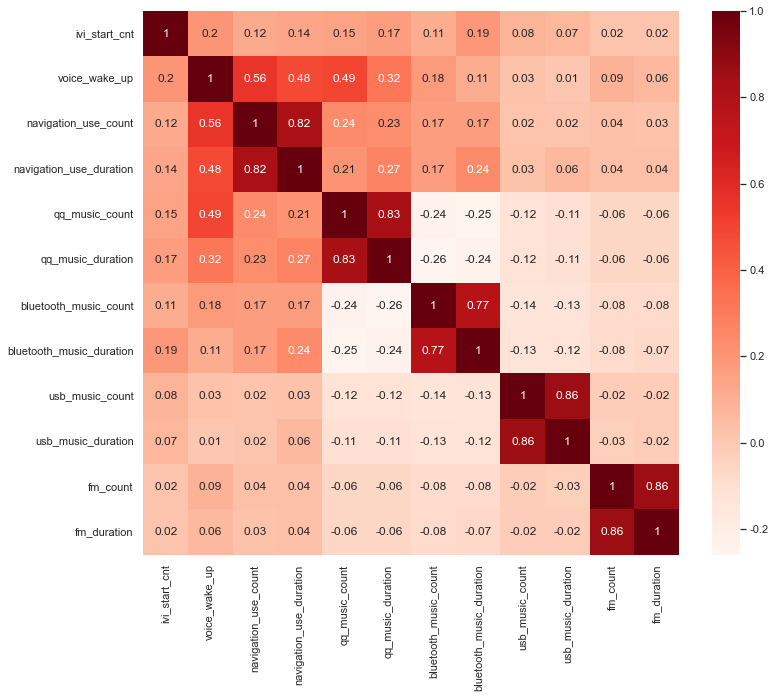

In [168]:
# 相关性分析
corr = df_customer.corr().round(2)
plt.figure(figsize=(12, 10))
sns.heatmap(corr,cmap='Reds',annot=True)

可以看到，“navigation_use_count”和“voice_wake_up”相关性比较高，说明用户在语音唤醒时大多为激活导航系统。此外，几乎每个功能的使用次数与使用时间相关性都很高，当两个变量的相关性高，说明两个变量在建立模型的时候，作用是一样或者效果是一样的，可以考虑组合或者删除其一。

In [169]:
# 删除所有功能的使用次数列
df_customer2 = df_customer.drop(['ivi_start_cnt', 'voice_wake_up', 'navigation_use_count', 
           'qq_music_count', 'bluetooth_music_count', 'usb_music_count', 'fm_count'],axis=1)
df_customer2.head()

,vin,car_series,navigation_use_duration,qq_music_duration,bluetooth_music_duration,usb_music_duration,fm_duration
0,LVSHFF******435353,CD542,190.000000,0.000000,15121.000000,0.0,0.0
1,LVSHFF******435354,CD542,0.000000,0.000000,3273.428571,0.0,0.0
2,LVSHFF******451575,CD542,3752.500000,5536.833333,0.000000,0.0,0.0
3,LVSHFF******451578,CD542,981.333333,0.000000,4266.666667,0.0,0.0
4,LVSHFF******454133,CD542,2584.571429,1772.285714,6401.571429,0.0,0.0


In [172]:
# 数据标准化
sacle_matrix = df_customer2.iloc[:, 2:]   # 获得要转换的矩阵
model_scaler = MinMaxScaler()     # 建立MinMaxScaler对象
data_scaled = model_scaler.fit_transform(sacle_matrix)
X = data_scaled


In [173]:
# 通过平均轮廓系数检验得到最佳KMeans聚类模型
score_list = list()  # 用来存储每个K下模型的平局轮廓系数
silhouette_int = -1  # 初始化的平均轮廓系数阀值
for n_clusters in range(3, 6):  # 遍历从2到5几个有限组
    model_kmeans = KMeans(n_clusters=n_clusters)  # 建立聚类模型对象
    labels_tmp = model_kmeans.fit_predict(X)  # 训练聚类模型
    silhouette_tmp = silhouette_score(X, labels_tmp)  # 得到每个K下的平均轮廓系数
    if silhouette_tmp > silhouette_int:  # 如果平均轮廓系数更高
        best_k = n_clusters  # 保存K将最好的K存储下来
        silhouette_int = silhouette_tmp  # 保存平均轮廓得分
        best_kmeans = model_kmeans  # 保存模型实例对象
        cluster_labels_k = labels_tmp  # 保存聚类标签
    score_list.append([n_clusters, silhouette_tmp])  # 将每次K及其得分追加到列表
print('{:*^60}'.format('K值对应的轮廓系数:'))
print(np.array(score_list))  # 打印输出所有K下的详细得分
print('最优的K值是:{0} \n对应的轮廓系数是:{1}'.format(best_k, silhouette_int))

*************************K值对应的轮廓系数:*************************
[[3.         0.41579257]
 [4.         0.35232358]
 [5.         0.34151053]]
最优的K值是:3 
对应的轮廓系数是:0.41579256510641244


In [174]:
# 将原始数据与聚类标签整合
cluster_labels = pd.DataFrame(cluster_labels_k, columns=['clusters']) # 获得训练集下的标签信息
merge_data = pd.concat((df_customer2, cluster_labels), axis=1)
merge_data.head()


,vin,car_series,navigation_use_duration,qq_music_duration,bluetooth_music_duration,usb_music_duration,fm_duration,clusters
0,LVSHFF******435353,CD542,190.000000,0.000000,15121.000000,0.0,0.0,1
1,LVSHFF******435354,CD542,0.000000,0.000000,3273.428571,0.0,0.0,0
2,LVSHFF******451575,CD542,3752.500000,5536.833333,0.000000,0.0,0.0,2
3,LVSHFF******451578,CD542,981.333333,0.000000,4266.666667,0.0,0.0,0
4,LVSHFF******454133,CD542,2584.571429,1772.285714,6401.571429,0.0,0.0,1


In [175]:
# 计算每个聚类类别下的样本量和样本占比
clustering_count = pd.DataFrame(merge_data['vin'].groupby(merge_data['clusters']).count()).T.rename({'vin': 'counts'})  # 计算每个聚类类别的样本量
clustering_ratio = (clustering_count / len(merge_data)).round(2).rename({'counts': 'percentage'})  # 计算每个聚类类别的样本量占比
print(clustering_count)
print("#"*30)
print(clustering_ratio)

clusters     0     1     2
counts    6775  1638  1269
##############################
clusters      0     1     2
percentage  0.7  0.17  0.13


In [198]:
# 计算各个聚类类别内部最显著特征值
cluster_features = []  # 空列表，用于存储最终合并后的所有特征信息
for line in range(best_k):  # 读取每个类索引
    label_data = merge_data[merge_data['clusters'] == line]  # 获得特定类的数据

    part1_data = label_data.iloc[:, 2:7]  # 获得数值型数据特征
    part1_desc = part1_data.describe().round(3)  # 得到数值型特征的描述性统计信息
    merge_data1 = part1_desc.iloc[2, :]  # 得到数值型特征的均值

    part2_data = label_data.iloc[:, 1:2]  # 获得字符串型数据特征
    part2_desc = part2_data.describe(include='all')  # 获得字符串型数据特征的描述性统计信息3
    merge_data2 = part2_desc.iloc[2, :]  # 获得字符串型数据特征的最频繁值

    merge_line = pd.concat((merge_data1, merge_data2), axis=0)  # 将数值型和字符串型典型特征沿行合并
    cluster_features.append(merge_line)  # 将每个类别下的数据特征追加到列表

#  输出完整的类别特征信息
cluster_pd = pd.DataFrame(cluster_features).T  # 将列表转化为矩阵
#print('{:*^60}'.format('每个类别主要的特征:'))
all_cluster_set = pd.concat((clustering_count, clustering_ratio, cluster_pd),axis=0)  # 将每个聚类类别的所有信息合并
all_cluster_set


,0,1,2
counts,6775,1638,1269
percentage,0.7,0.17,0.13
navigation_use_duration,972.273,3388.214,3035.306
qq_music_duration,1513.936,1176.232,3796.969
bluetooth_music_duration,2598.203,6049.767,2567.807
usb_music_duration,1858.953,1850.38,581.418
fm_duration,1311.607,923.219,773.708
car_series,CD542,CD542,CD542


由此可见，用户可大体分为三类：

类别1 使用蓝牙音乐，USB音乐和QQ音乐和FM时长较高的用户，且各功能使用时长相差不大，其占比70%。

类别2 同时经常使用USB音乐和百度导航的用户，占比17%。

类别3 经常使用百度导航，QQ音乐和蓝牙音乐的用户，占比13%。

# 问题3:数据结论

综上所述，音乐类功能在使用频率和时长上占较大比率，其次是百度导航。蓝牙连接已经逐步取代USB连接。此外，QQ音乐拥有较高的使用次数，而蓝牙音乐具有较高的使用时长，推测其原因可能为QQ音乐在车技上的适配做的不好，可能经常发生闪退的现象。

对比两个车型的用户习惯可以发现，锐界用户更偏爱较为传统的功能模块，比如FM以及USB音乐，蒙迪欧用户则更为年轻化。

通过相关性分析可以发现，语音唤醒主要与百度导航和QQ音乐相连接。